# Recipes and Ratings

**Name(s)**: Morgan Stevenson, Arah Sanders

**Website Link**: https://mestevenson-7.github.io/Recipe-Rating-Relationship-Analysis/

In [80]:
from gettext import install
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

In [81]:
print('This project will investigate if easier recipes tend to have higher ratings than ones that are less easy.')

This project will investigate if easier recipes tend to have higher ratings than ones that are less easy.


## Step 2: Data Cleaning and Exploratory Data Analysis

In [82]:
# rename ratings 'recipe_id' column to 'id' for merging
ratings = pd.read_csv(Path('data') / 'interactions.csv').rename(columns={'recipe_id':'id'})
recipes = pd.read_csv(Path('data') / 'RAW_recipes.csv')

In [83]:
# merge on left for recipes
merged = recipes.merge(ratings, on='id', how='left')
# change 0 ratings to np.nan
merged.loc[merged['rating'] == 0, 'rating'] = np.nan

# average rating
avg_rating = merged.groupby('id')['rating'].mean().reset_index().rename(columns={'rating':'average rating'})
df = merged.merge(avg_rating, on='id', how='left')

# fix relevant columns
df['steps'] = df['steps'].apply(lambda x: eval(x))
df['ingredients'] = df['ingredients'].apply(lambda x: eval(x))
df['rating'] = df['rating'].astype('Int8')
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,date,rating,review,average rating
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,[heat the oven to 350f and arrange the rack in...,"these are the most; chocolatey, moist, rich, d...","[bittersweet chocolate, unsalted butter, eggs,...",9,3.865850e+05,2008-11-19,4,"These were pretty good, but took forever to ba...",4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"[pre-heat oven the 350 degrees f, in a mixing ...",this is the recipe that we use at my school ca...,"[white sugar, brown sugar, salt, margarine, eg...",11,4.246800e+05,2012-01-26,5,Originally I was gonna cut the recipe in half ...,5.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"[preheat oven to 350 degrees, spray a 2 quart ...",since there are already 411 recipes for brocco...,"[frozen broccoli cuts, cream of chicken soup, ...",9,2.978200e+04,2008-12-31,5,This was one of the best broccoli casseroles t...,5.0
3,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"[preheat oven to 350 degrees, spray a 2 quart ...",since there are already 411 recipes for brocco...,"[frozen broccoli cuts, cream of chicken soup, ...",9,1.196280e+06,2009-04-13,5,I made this for my son's first birthday party ...,5.0
4,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"[preheat oven to 350 degrees, spray a 2 quart ...",since there are already 411 recipes for brocco...,"[frozen broccoli cuts, cream of chicken soup, ...",9,7.688280e+05,2013-08-02,5,Loved this. Be sure to completely thaw the br...,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234424,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8,8.445540e+05,2009-10-14,5,These were very good. I meant to add some jala...,5.0
234425,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,[place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10,8.042340e+05,2008-05-02,1,I would rate this a zero if I could. I followe...,1.0
234426,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"[whip sugar and shortening in a large bowl , a...","i've heard of the 'cookies by design' company,...","[granulated sugar, shortening, eggs, flour, cr...",7,8.666510e+05,2008-06-19,1,This recipe tastes nothing like the Cookies by...,3.0
234427,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"[whip sugar and shortening in a large bowl , a...","i've heard of the 'cookies by design' company,...","[granulated sugar, shortening, eggs, flour, cr...",7,1.546277e+06,2010-02-08,5,"yummy cookies, i love this recipe me and my sm...",3.0


In [84]:
#create df to work with missingness later in notebook
missing = df.copy()

In [86]:
# Subset data frame to only include columns of interest
# Keep only the relevant columns and reassign to df
df = df[['id', 'minutes', 'n_steps', 'n_ingredients', 'rating', 'average rating']]
df.head()

,id,minutes,n_steps,n_ingredients,rating,average rating
0,333281,40,10,9,4,4.0
1,453467,45,12,11,5,5.0
2,306168,40,6,9,5,5.0
3,306168,40,6,9,5,5.0
4,306168,40,6,9,5,5.0


In [120]:
print(df.head().to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>minutes</th>
      <th>n_steps</th>
      <th>n_ingredients</th>
      <th>rating</th>
      <th>average rating</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>333281</td>
      <td>40</td>
      <td>10</td>
      <td>9</td>
      <td>4</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>453467</td>
      <td>45</td>
      <td>12</td>
      <td>11</td>
      <td>5</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>306168</td>
      <td>40</td>
      <td>6</td>
      <td>9</td>
      <td>5</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>306168</td>
      <td>40</td>
      <td>6</td>
      <td>9</td>
      <td>5</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>306168</td>
      <td>40</td>
      <td>6</td>
      <td>9</td>
      <td>5</td>
      <td>5.0</td>
  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style
sns.set(style="whitegrid")

In [94]:
import plotly.express as px

In [132]:
fig_mins = px.histogram(x=df['minutes'],
                   title='Distribution of Minutes',
                   nbins=int(df['minutes'].max() / 10),
                   range_x=[0, df['minutes'].quantile(0.95)],
                   labels={'x': 'minutes'})
fig_mins.update_traces(marker_line_width=1, marker_line_color="white")
fig_mins.show()
fig_mins.write_html('mins_distribution.html', include_plotlyjs='cdn')

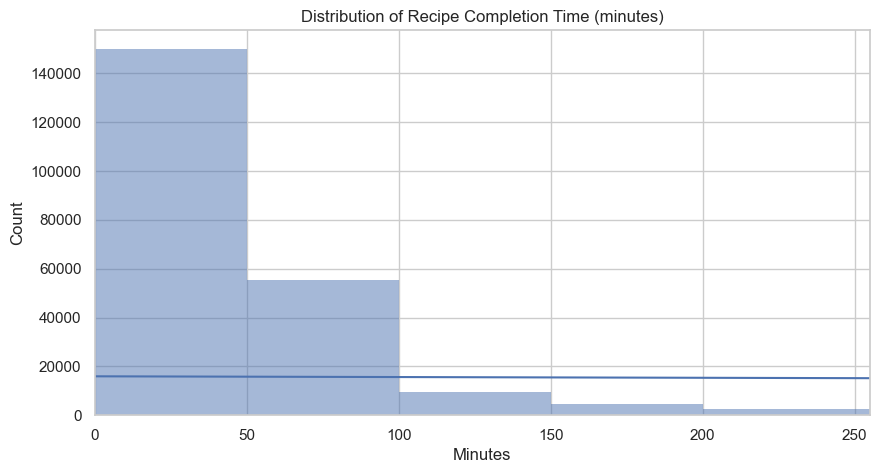

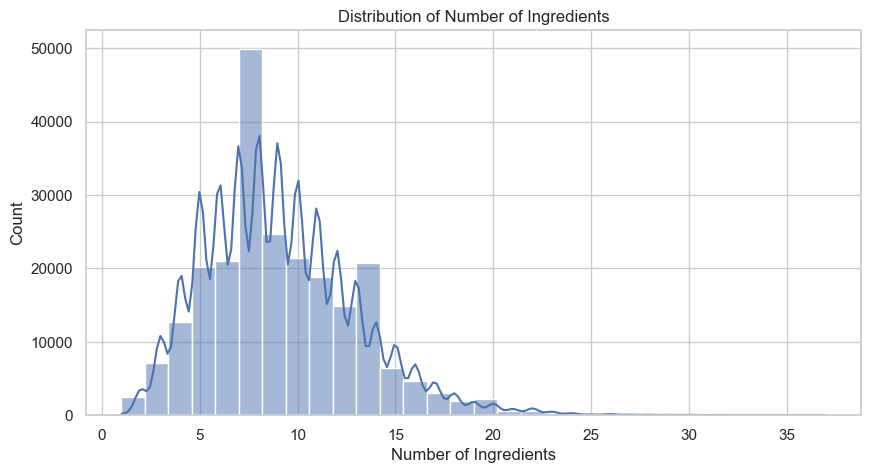

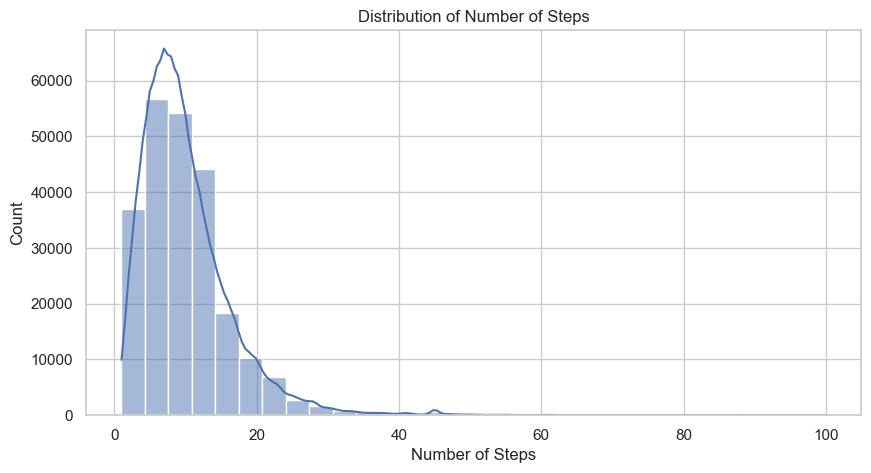

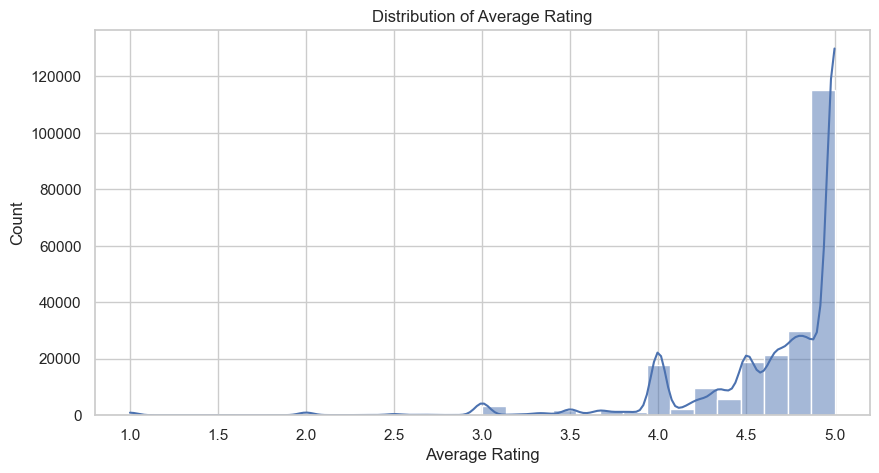

In [ ]:
# Histogram for 'minutes'
plt.figure(figsize=(10, 5))
sns.histplot(df['minutes'], binwidth=50, kde=True)
plt.title('Distribution of Recipe Completion Time (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.xlim(0, df['minutes'].quantile(0.95))  # Trim extreme outliers
plt.show()

# Histogram for 'n_ingredients'
plt.figure(figsize=(10, 5))
sns.histplot(df['n_ingredients'], bins=30, kde=True)
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Count')
plt.show()

# Histogram for 'n_steps'
plt.figure(figsize=(10, 5))
sns.histplot(df['n_steps'], bins=30, kde=True)
plt.title('Distribution of Number of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.write_html('file-name.html', include_plotlyjs='cdn')
plt.show()

# Histogram for 'n_steps'
plt.figure(figsize=(10, 5))
sns.histplot(df['average rating'], bins=30, kde=True)
plt.title('Distribution of Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()


In [9]:
df['rating'].describe()

count    2300464.0
mean      4.690432
std       0.781537
min            1.0
25%            5.0
50%            5.0
75%            5.0
max            5.0
Name: rating, dtype: Float64

In [10]:
df['average rating'].describe()

count    2.535484e+06
mean     4.683070e+00
std      3.410608e-01
min      1.000000e+00
25%      4.568966e+00
50%      4.767442e+00
75%      4.935484e+00
max      5.000000e+00
Name: average rating, dtype: float64

In [11]:
df['n_ingredients'].describe()

count    2.538649e+06
mean     9.168323e+00
std      4.129953e+00
min      1.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      3.700000e+01
Name: n_ingredients, dtype: float64

In [12]:
df['n_steps'].describe()

count    2.538649e+06
mean     1.142538e+01
std      8.061948e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.400000e+01
max      1.000000e+02
Name: n_steps, dtype: float64

In [13]:
df['minutes'].describe()

count    2.538649e+06
mean     1.719288e+02
std      1.896397e+03
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      7.000000e+01
max      1.051200e+06
Name: minutes, dtype: float64

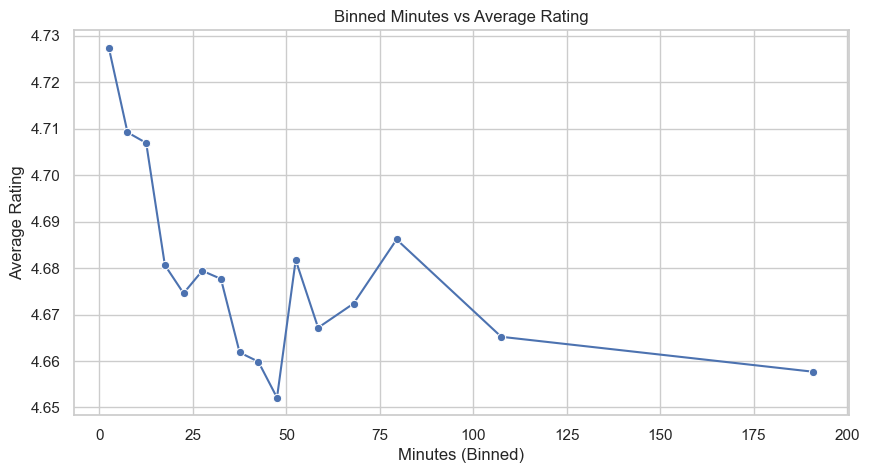

In [50]:
# Bin minutes and calculate mean average_rating per bin
df_binned = df[df['minutes'] < df['minutes'].quantile(0.95)].copy()
df_binned['minutes_bin'] = pd.qcut(df_binned['minutes'], q=20, duplicates='drop')

grouped = df_binned.groupby('minutes_bin', observed=False)['average rating'].mean().reset_index()
grouped['midpoint'] = grouped['minutes_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 5))
sns.lineplot(x='midpoint', y='average rating', data=grouped, marker='o')
plt.title('Binned Minutes vs Average Rating')
plt.xlabel('Minutes (Binned)')
plt.ylabel('Average Rating')
plt.show()

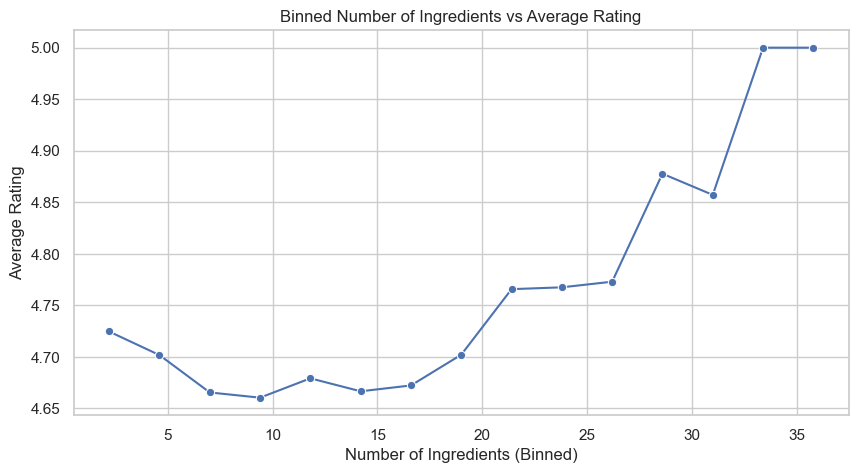

In [53]:
# Bin n_ingredients and calculate mean average_rating per bin
df_binned_ing = df.copy()
df_binned_ing['ingredients_bin'] = pd.cut(df_binned_ing['n_ingredients'], bins=15)

grouped_ing = df_binned_ing.groupby('ingredients_bin', observed=False)['average rating'].mean().reset_index()
grouped_ing['midpoint'] = grouped_ing['ingredients_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 5))
sns.lineplot(x='midpoint', y='average rating', data=grouped_ing, marker='o')
plt.title('Binned Number of Ingredients vs Average Rating')
plt.xlabel('Number of Ingredients (Binned)')
plt.ylabel('Average Rating')
plt.show()


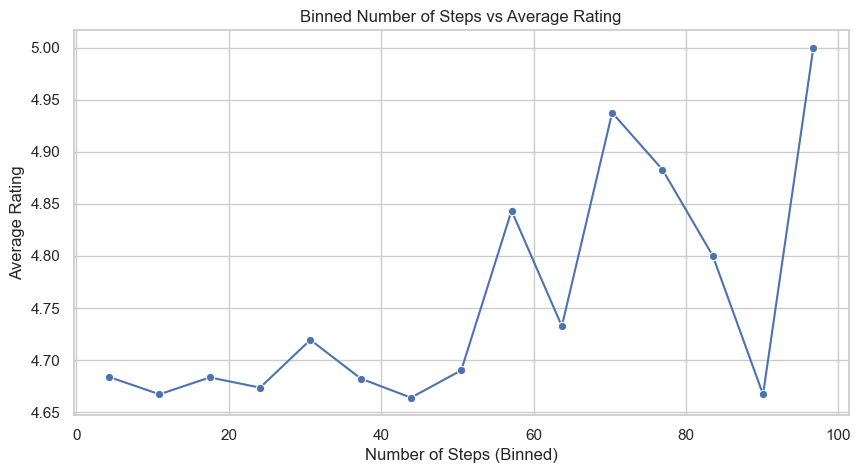

In [59]:
# Bin n_steps and calculate mean average_rating per bin
df_binned_steps = df.copy()
df_binned_steps['steps_bin'] = pd.cut(df_binned_steps['n_steps'], bins=15)

grouped_steps = df_binned_steps.groupby('steps_bin', observed=False)['average rating'].mean().reset_index()
grouped_steps['midpoint'] = grouped_steps['steps_bin'].apply(lambda x: x.mid)

plt.figure(figsize=(10, 5))
sns.lineplot(x='midpoint', y='average rating', data=grouped_steps, marker='o')
plt.title('Binned Number of Steps vs Average Rating')
plt.xlabel('Number of Steps (Binned)')
plt.ylabel('Average Rating')
plt.show()

In [64]:
# Create bins for each difficulty metric
df.loc[df.index, 'steps_bin'] = pd.cut(df['n_steps'], bins=5)
df.loc[df_binned.index, 'minutes_bin'] = pd.qcut(df_binned['minutes'], q=5, duplicates='drop')
df.loc[df.index, 'ingredients_bin'] = pd.cut(df['n_ingredients'], bins=5)

# Group by each bin and calculate average rating and mean rating per review
grouped_steps = df.groupby('steps_bin', observed=False)[['average rating', 'rating']].mean().reset_index()
grouped_minutes = df.groupby('minutes_bin', observed=False)[['average rating', 'rating']].mean().reset_index()
grouped_ingredients = df.groupby('ingredients_bin', observed=False)[['average rating', 'rating']].mean().reset_index()

# View summary tables
print("Grouped by Steps:\n", grouped_steps)
print("\nGrouped by Minutes:\n", grouped_minutes)
print("\nGrouped by Ingredients:\n", grouped_ingredients)


Grouped by Steps:
        steps_bin  average rating    rating
0  (0.901, 20.8]        4.676063  4.679352
1   (20.8, 40.6]        4.682909  4.687489
2   (40.6, 60.4]        4.683892   4.68682
3   (60.4, 80.2]        4.825431  4.818182
4  (80.2, 100.0]        4.727273      4.72

Grouped by Minutes:
       minutes_bin  average rating    rating
0  (-0.001, 15.0]        4.714860  4.718794
1    (15.0, 30.0]        4.678373  4.681468
2    (30.0, 40.0]        4.669814  4.670541
3    (40.0, 62.0]        4.663692   4.66672
4   (62.0, 252.0]        4.670713  4.674644

Grouped by Ingredients:
   ingredients_bin  average rating    rating
0    (0.964, 8.2]        4.680971  4.685171
1     (8.2, 15.4]        4.669306  4.671823
2    (15.4, 22.6]        4.690411  4.693087
3    (22.6, 29.8]        4.779259  4.782734
4    (29.8, 37.0]        4.862745  4.862745


In [65]:
# Pivot table showing average rating by binned difficulty
pivot_table = df.pivot_table(
    index='steps_bin',
    values=['average rating', 'rating'],
    aggfunc='mean',
    observed=False
)

pivot_table

,average rating,rating
steps_bin,,
"(0.901, 20.8]",4.676063,4.679352
"(20.8, 40.6]",4.682909,4.687489
"(40.6, 60.4]",4.683892,4.68682
"(60.4, 80.2]",4.825431,4.818182
"(80.2, 100.0]",4.727273,4.72


In [69]:
# Create pivot table grouped by ingredients_bin
pivot_table_ingredients = df.pivot_table(
    index='ingredients_bin',
    values=['average rating', 'rating'],
    aggfunc='mean',
    observed=False
)

pivot_table_ingredients


,average rating,rating
ingredients_bin,,
"(0.964, 8.2]",4.680971,4.685171
"(8.2, 15.4]",4.669306,4.671823
"(15.4, 22.6]",4.690411,4.693087
"(22.6, 29.8]",4.779259,4.782734
"(29.8, 37.0]",4.862745,4.862745


In [70]:
# Create pivot table grouped by minutes_bin
pivot_table_minutes = df.pivot_table(
    index='minutes_bin',
    values=['average rating', 'rating'],
    aggfunc='mean',
    observed=False
)

pivot_table_minutes

,average rating,rating
minutes_bin,,
"(-0.001, 15.0]",4.714860,4.718794
"(15.0, 30.0]",4.678373,4.681468
"(30.0, 40.0]",4.669814,4.670541
"(40.0, 62.0]",4.663692,4.66672
"(62.0, 252.0]",4.670713,4.674644


## Step 3: Assessment of Missingness

In [71]:
#Exploring missingness in the data 

# Count of missing values per column
missing_counts = missing.isnull().sum()
missing_percent = (missing_counts / len(missing)) * 100

#df which summarizes missingness in each column
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percent.round(2)
})

missing_summary


,Missing Count,Missing Percentage
name,1,0.00
id,0,0.00
minutes,0,0.00
contributor_id,0,0.00
submitted,0,0.00
tags,0,0.00
nutrition,0,0.00
n_steps,0,0.00
steps,0,0.00
description,114,0.05


In [21]:

# Step 1: Create a missingness indicator for 'review'
missing['review_missing'] = missing['review'].isnull()

# Step 2: Define permutation test function
def permutation_test(data, col_to_test, missing_col, num_permutations=1000):
    # Actual difference in means between missing/not-missing groups
    group1 = data[data[missing_col] == True][col_to_test].dropna()
    group2 = data[data[missing_col] == False][col_to_test].dropna()
    observed_diff = abs(group1.mean() - group2.mean())

    # Null distribution via permutations
    combined = np.concatenate([group1, group2])
    diffs = []

    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:len(group1)]
        new_group2 = combined[len(group1):]
        diffs.append(abs(new_group1.mean() - new_group2.mean()))

    p_value = np.mean([diff >= observed_diff for diff in diffs])

    # Plot
    sns.histplot(diffs, kde=True)
    plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed diff = {observed_diff:.4f}')
    plt.title(f'Permutation Test for {col_to_test} vs Missingness in {missing_col}')
    plt.xlabel('Difference in Means (null distribution)')
    plt.legend()
    plt.show()

    return observed_diff, p_value


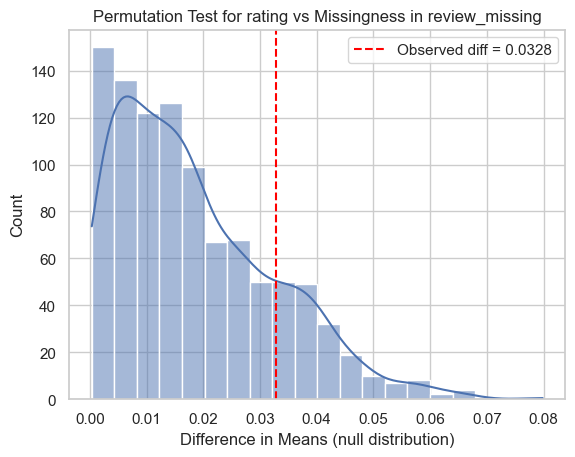

Rating → Review missingness: Observed diff = 0.0328, p-value = 0.1750


In [22]:
obs_diff_rating, p_val_rating = permutation_test(missing, 'rating', 'review_missing')
print(f"Rating → Review missingness: Observed diff = {obs_diff_rating:.4f}, p-value = {p_val_rating:.4f}")

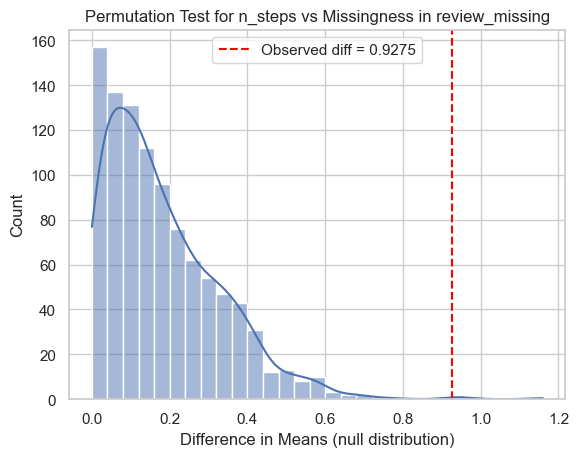

n_steps → Review missingness: Observed diff = 0.9275, p-value = 0.0030


In [23]:
obs_diff_steps, p_val_steps = permutation_test(missing, 'n_steps', 'review_missing')
print(f"n_steps → Review missingness: Observed diff = {obs_diff_steps:.4f}, p-value = {p_val_steps:.4f}")

In [24]:
steps_when_review_missing = missing[missing['review'].isnull()]['n_steps']

steps_when_review_missing.describe()

count    1149.000000
mean       12.352480
std         8.295304
min         6.000000
25%         7.000000
50%         9.000000
75%        15.000000
max       100.000000
Name: n_steps, dtype: float64

## Step 4: Hypothesis Testing

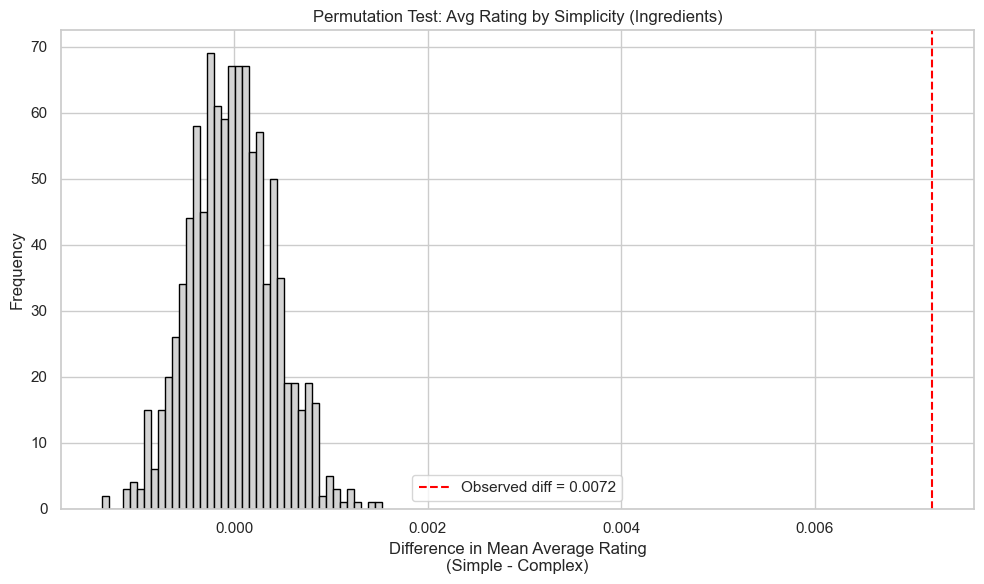

Observed difference in means: 0.0072
P-value: 0.0000


In [ ]:
import matplotlib.pyplot as plt

# Drop missing values
df_test = df.dropna(subset=['n_ingredients', 'average rating'])

# Define simple vs complex by median number of ingredients
median_ingredients = df_test['n_ingredients'].median()
simple = df_test[df_test['n_ingredients'] < median_ingredients]['average rating']
complex_ = df_test[df_test['n_ingredients'] >= median_ingredients]['average rating']

# Observed difference in means
observed_diff = simple.mean() - complex_.mean()

# Permutation test
combined = np.concatenate([simple, complex_])
n_permutations = 1000
perm_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined)
    perm_simple = combined[:len(simple)]
    perm_complex = combined[len(simple):]
    perm_diffs.append(perm_simple.mean() - perm_complex.mean())

# Calculate p-value
p_value = np.mean(np.array(perm_diffs) >= observed_diff)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(perm_diffs, bins=40, color='lightgray', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed diff = {observed_diff:.4f}')
plt.title('Permutation Test: Avg Rating by Simplicity (Ingredients)')
plt.xlabel('Difference in Mean Average Rating\n(Simple - Complex)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Print results
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"P-value: {p_value:.4f}")


## Step 5: Framing a Prediction Problem

In [ ]:
"""
We aim to predict the individual rating a user might give a recipe based on various observable features of that recipe. Understanding what factors contribute to higher 
or lower ratings can help us better assess recipe quality and user preferences, even before a recipe receives many reviews.
"""

## Step 6: Baseline Model

In [ ]:
# TODO

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO